# image labelling code
developing code for automatic / quick image labelling


i have discovered using the terminal is a nightmare to do labelling, so i will copy someone else who has already made a program to label in jupyter notebook.

In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from glob import glob
import csv
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math
import shutil

In [2]:
## directory of set of images i would like to label + corresponding csv to populate
#folder_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/2ds_5000_100125/'
folder_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/combined/2ds_5000_100125/'
#test_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/'
# open csv quickly to check it is correct + in the format we expect
csv_file_name = '2ds_5000_100125.csv'
saving_csv_name = '2ds_5000_100125_test.csv'
csv_full_path = os.path.join(folder_path,csv_file_name)
csv_read_pd = pd.read_csv(csv_full_path)
print(f'reading {csv_full_path}')
print(f'saving to {folder_path+saving_csv_name}')
n_images_done = csv_read_pd['number_label'].count()
print(f'number of images already labelled: {n_images_done}')
csv_read_pd.head()

reading /gws/nopw/j04/dcmex/users/ezriab/image_labelling/combined/2ds_5000_100125/2ds_5000_100125.csv
saving to /gws/nopw/j04/dcmex/users/ezriab/image_labelling/combined/2ds_5000_100125/2ds_5000_100125_test.csv
number of images already labelled: 0


,image_name,number_label
0,688501_25ch1,NaN
1,796774_20ch0,NaN
2,611166_19ch0,NaN
3,806433_30ch1,NaN
4,1378901_25ch0,NaN


# label things

796774_20ch0


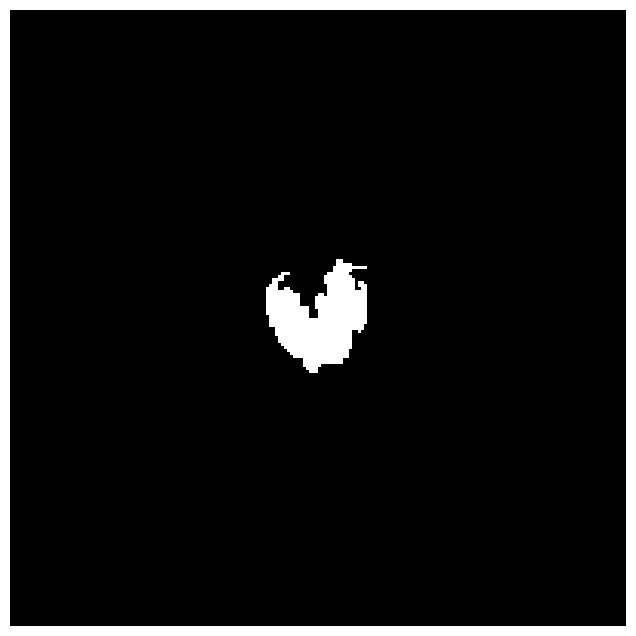

In [ ]:
### function to ensure all images are captured + save the new csv

def saving_function(new_images, new_labels, og_df_name_list):
    if len(new_images) < len(og_df_name_list):
        not_labelled = list(set(og_df_name_list) - set(new_images))
        new_images.extend(not_labelled)  # Modifies the list in place
        new_labels.extend([np.nan] * len(not_labelled))

    new_csv_dic = {'image_name': new_images, 'number_label':new_labels}
    df = pd.DataFrame(new_csv_dic)
    df.to_csv(full_save_csv_path, index=False)
    print(f'{saving_csv_name} saved!')
    return df

# some things need to be defined before starting the processing loop
image_name_lst = []
new_image_label_lst = []
all_image_names = list(csv_read_pd['image_name'])
full_save_csv_path = os.path.join(folder_path,saving_csv_name)


with open(csv_full_path, mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # Read the header row
    # loop through each row
    for row in csv_reader:
        image_name = row[0]
        label = row[1]        
        
        # label returns false for nan, so will just write names / labels aleady there
        if label: 
            #num = int(label) # convert to number (corresponding to label)
            image_name_lst.append(image_name)
            new_image_label_lst.append(label)
                
        ## if is a nan, will follow this loop for labelling
        else:
            print(image_name)
            im = Image.open(os.path.join(folder_path, image_name + '.png'))
            plt.figure(figsize=(8, 8))
            plt.imshow(im)
            plt.axis('off')
            plt.show()
            while True: # loop will continue until a valid entry is passed
                inp = input("Enter a label (0-9 or 11, or 'stop' to quit): ") ## label of image

                ## if write 'stop' will stop labelling + save what has been done
                if inp.lower() == 'stop':
                    print("Stopped labeling.")
                    done_images = saving_function(image_name_lst,new_image_label_lst,all_image_names)
                    raise SystemExit  # Exit gracefully
                
                try:
                    num = int(inp) # convert to number (corresponding to label)
                    if 0 <= num <= 11:  # Check if the number is in the valid range
                        clear_output(wait=True) # get rid of image once you've labelled it
                        image_name_lst.append(image_name)
                        new_image_label_lst.append(num)
                        break  # Exit the loop if the input is valid
                    else:
                        print("Error: Label must be between 0 and 11.")
                except ValueError: # if we don't input a number -> stop labelling, so will break
                    print("not words, what are you doing???")
                    
                    
done_images = saving_function(image_name_lst,new_image_label_lst,all_image_names)

## hide extra stuff

In [5]:
done_images['number_label'].count()
#df.to_csv(csv_file_list[0], index=False) 

5000

In [6]:
#folder_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/2ds_3000_030125/'
#an_path = os.path.join(folder_path,'2ds_3000_030125_1st.csv')
quick_check_csv = pd.read_csv(folder_path+saving_csv_name)
quick_check_csv['number_label'].count()

5000

In [20]:
quick_check_csv['number_label'].count()

1329

In [7]:
## copy newly labelled csv to github too
git_path = '/home/users/esree/CNN_basics/save_progress/'
shutil.copy(full_save_csv_path, git_path)

'/home/users/esree/CNN_basics/save_progress/2ds_5000_100125_7th.csv'

In [ ]:
data = {
    'A': [10, 20, 20, 40, 20, 23, 20, 86, 20],
    'B': [5,  10, np.nan, 33, 25, 20, np.nan, 33, np.nan]
}
a_df = pd.DataFrame(data)

some_idx = a_df.index[a_df['A']== 20].tolist()

for i in range(len(some_idx)):
    idx = some_idx[i]
    row = a_df.loc[idx]
    image_name = row.iloc[0]
    og_label = row.iloc[1]
    
    if not pd.isna(og_label):
        continue
    
    #else:
    while True:
        print(idx)
        #while True:
        inp = input("Enter a label (0-9 or 11, or 'stop' to quit): ")
        if inp.lower() == 'stop':
            print("Stopped labeling.")
            #break 
            raise SystemExit  # Exit the entire program gracefully ## stop labelling for now
            
        try:
            num = int(inp) # convert to number (corresponding to label)
            if 0 <= num <= 11:  # Check if the number is in the valid range
                clear_output(wait=True) # get rid of image once you've labelled it
                ## as working in a df, we over-write the correct cell
                a_df.loc[idx, 'B'] = num
                break
            else:
                print("Error: Label must be between 0 and 11.")
        except ValueError: # if we don't input a number -> stop labelling, so will break
            print("not words, what are you doing???")


